## Unsupervised Machine Learning

### This script contains the following:

#### 1. Importing libraries and data and standardizing data
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and standardizing data

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
# This command prompts matplotlib visuals to appear in the notebook

%matplotlib inline

In [26]:
# Create path

path = r'/Users/chadstacey'

In [27]:
# Import movies data

movies = pd.read_pickle(os.path.join(path, 'CF_Final_Project', 'Data', 'Prepared_Data', 'movies_cleaned_1.pkl'))

In [28]:
# Check output 

movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,score category
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,44287414.0,High score
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,64136369.0,Middle score
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,164800601.0,Middle score
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,66660248.0,High score
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,9564613.0,Middle score


In [29]:
movies.shape

(6820, 17)

In [30]:
# Remove categorical variables 

movies = movies.drop(['company', 'country', 'director', 'genre', 'name', 'rating', 'released', 'star', 'writer', 'year', 'score category'], axis=1)

In [31]:
movies.shape

(6820, 6)

##### Standardize the data:

Text(0.5, 1.0, 'Visualisation of raw data')

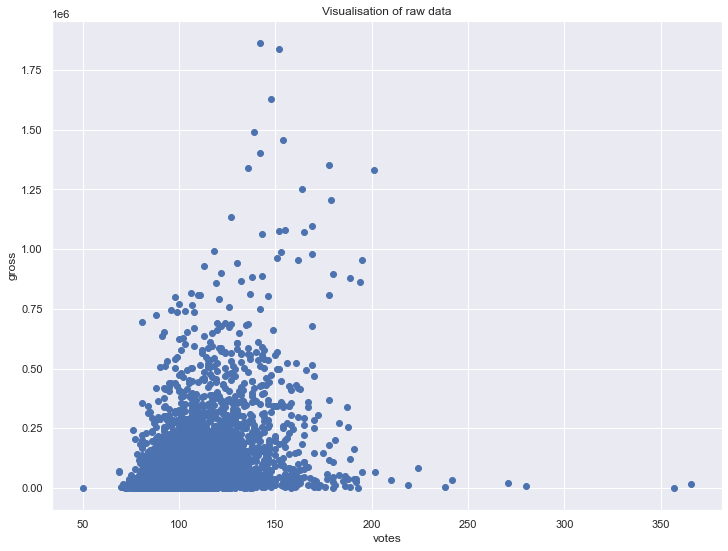

In [39]:
# Visualise the raw data

plt.figure(figsize = (12,9))
plt.scatter(movies.iloc[:, 2], movies.iloc[:, 4])
plt.xlabel('votes')
plt.ylabel('gross')
plt.title('Visualisation of raw data')

In [40]:
# Use StandardScaler to standardize data

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(movies)

In [41]:
# Fit standardized data using PCA

pca = PCA()
pca.fit(segmentation_std)

PCA()

In [42]:
# Show variance

pca.explained_variance_ratio_

array([4.84262100e-01, 2.03511658e-01, 1.62359602e-01, 9.22919267e-02,
       5.75747133e-02, 2.92551479e-32])

### 2. The elbow technique

In [51]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [53]:
score = [kmeans[i].fit(movies).score(movies) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4.395697654011208e+19,
 -2.2386420968076497e+19,
 -1.5855732129844265e+19,
 -1.2283242944630843e+19,
 -9.774951704571939e+18,
 -8.241413620690241e+18,
 -6.98761673561807e+18,
 -6.02465588357524e+18,
 -5.330296493111906e+18]

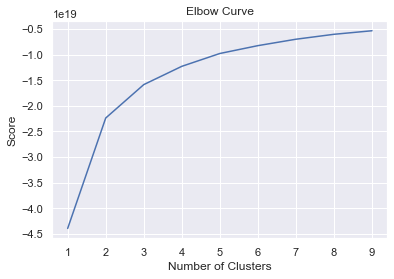

In [54]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is three.

### 3. k-means clustering

In [55]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [56]:
# Fit the k-means object to the data.

kmeans.fit(movies)

/Users/chadstacey/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [57]:
movies['clusters'] = kmeans.fit_predict(movies)

/Users/chadstacey/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [58]:
movies.head()

,budget,gross,runtime,score,votes,profit,clusters
0,8000000.0,52287414.0,89,8.1,299174,44287414.0,0
1,6000000.0,70136369.0,103,7.8,264740,64136369.0,2
2,15000000.0,179800601.0,110,6.9,236909,164800601.0,2
3,18500000.0,85160248.0,137,8.4,540152,66660248.0,2
4,9000000.0,18564613.0,90,6.9,36636,9564613.0,0


In [59]:
movies['clusters'].value_counts()

0    5591
2    1071
1     158
Name: clusters, dtype: int64

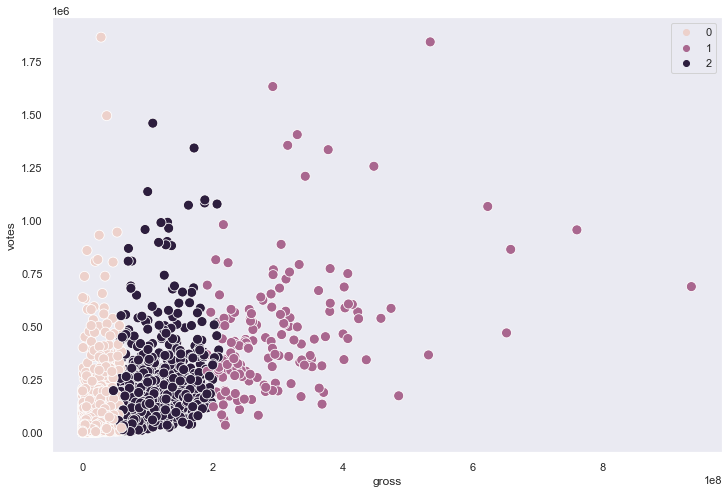

In [60]:
# Plot the clusters for the 'votes'and 'gross' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=movies['gross'], y=movies['votes'], hue=kmeans.labels_, s=100) 
# Here, I'm subsetting 'X' for the x and y arguments to avoid using their labels
# 'hue' takes the value of the attribute 'kmeans.labels_', which is the result of running the k-means algorithm

ax.grid(False) # This removes the grid from the background.
plt.xlabel('gross') # Label x-axis.
plt.ylabel('votes') # Label y-axis.
plt.show()

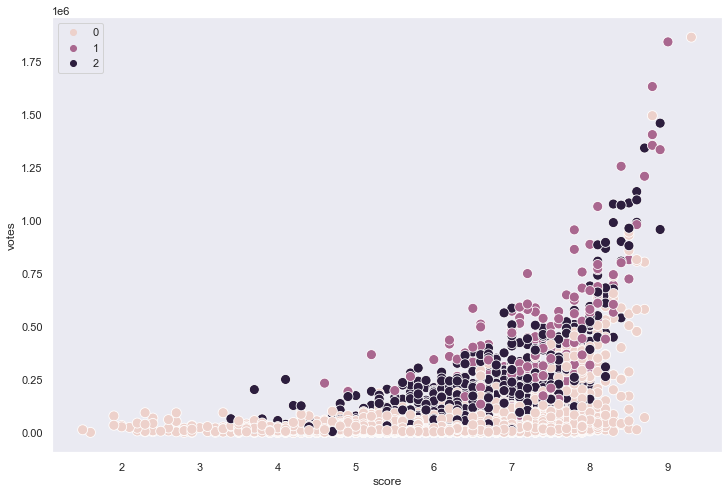

In [62]:
# Plot the clusters for the 'score'and 'votes' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=movies['score'], y=movies['votes'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('score') 
plt.ylabel('votes') 
plt.show()

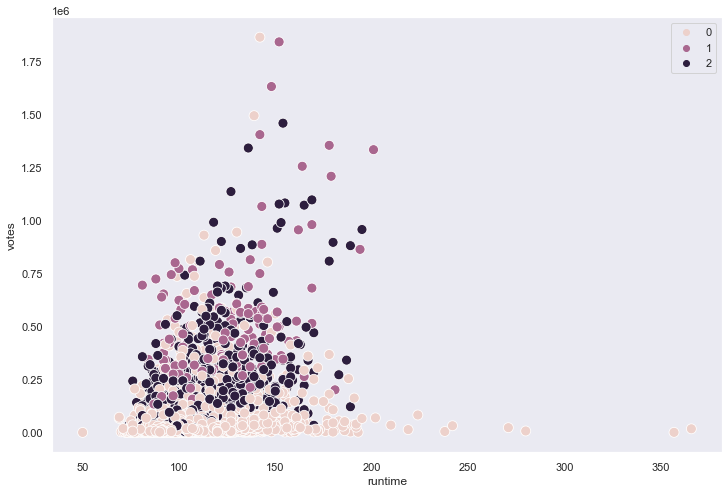

In [63]:
# Plot the clusters for the 'runtime' and 'votes' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=movies['runtime'], y=movies['votes'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('runtime') 
plt.ylabel('votes') 
plt.show()

I think all these clusters make sense. I explored the relationship between 'votes' and 'gross' in the previous task and, although I wasn't able to demonstrate a linear relationship, these clusters show that generally the gross profit of a film does have an impact on how many votes it garners on IMDb (the higher the gross, the higher the number of votes).

The clusters for 'score' and 'votes' make sense. There doesn't seem to be a significant relationship but it does seem the films with really low scores are ones that havent generated that many votes - they are likely to be trule awful films that weren't really propelled into the public sphere. 

The clusters for 'runtime' and 'votes' also make sense - I didn't really anticipate there being any relationship between the two and the model has proved this to be the case. 

In [66]:
movies.loc[movies['clusters'] == 2, 'cluster'] = 'dark purple'
movies.loc[movies['clusters'] == 1, 'cluster'] = 'purple'
movies.loc[movies['clusters'] == 0, 'cluster'] = 'pink'

In [68]:
movies.groupby('cluster').agg({'runtime':['mean', 'median'], 
                         'score':['mean', 'median'], 
                         'gross':['mean', 'median'],
                          'votes':['mean', 'median']})

runtime            score                gross               \
                   mean median      mean median          mean       median   
cluster                                                                      
dark purple  112.367880    110  6.565546   6.60  9.979741e+07   89021735.0   
pink         104.967627    101  6.313271   6.40  1.319684e+07    6507514.0   
purple       123.164557    124  7.263291   7.35  3.024599e+08  275707604.0   

                     votes          
                      mean  median  
cluster                             
dark purple  176448.109244  129642  
pink          39976.927562   17585  
purple       463482.386076  416136

The purple cluster has the best stats - it generally has the longest runtime, the highest score, the highest gross and the most votes on IMDb. These stats would suggest that runtime does have an effect on score - longer movies generally score higher (although this may be based on fewer votes). 